# Deep Learning Fundamentals - LU01-B Lab Exercise

## 2.0 Structured data analysis using Pandas

The purpose of this lab exercise is to demonstrate the analyzing of categorical data and to transform them to numerical format using different methods. The steps selects the categorical columns and their respective data to a separate array for demonstration purpose.

## 2.1 Import required package and load data from file into pandas dataframe

In [1]:
import pandas as pd
import numpy as np

# Import the data using the file path. sep is the separator format in the file
data = pd.read_csv('Ames_Housing_Sales.csv', sep=',')

# Count the number of fields for different types of data in the dataframe
print(data.dtypes.value_counts())

object     43
float64    21
int64      16
dtype: int64


## 2.2 Analyze data types in the dataframe
To identify which are the categorical data in the dataset, we can analyze it through the data types of all the fields in the dataframe.

In [2]:
# Datafield and the types in the dataframe
print(data.dtypes)

1stFlrSF        float64
2ndFlrSF        float64
3SsnPorch       float64
Alley            object
BedroomAbvGr      int64
                 ...   
WoodDeckSF      float64
YearBuilt         int64
YearRemodAdd      int64
YrSold            int64
SalePrice       float64
Length: 80, dtype: object


In [3]:
# Summary of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

To extract the list of columns that contain categorical data, we make use of the dtypes in the dataframe. The following first identify if the columns are categorical and for those that are, extract the columns names that has it set to true.

In [4]:
# True if the dtype is object (i.e categorical), otherwise False
mask = data.dtypes == object

# Extract column names that are categorical
categorical_cols = data.columns[mask]
print(categorical_cols)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')


Alternatively, you can also retrieve a copy of the data and their column names  through selecting the columns that are of object type for separate analysis

In [5]:
# Extract categorical data and duplicate a copy of the content
categorical_data = data.select_dtypes(include=['object']).copy()

# Print out first 5 records
print(categorical_data.head())

  Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0  None     1Fam       TA           No          GLQ          Unf       Gd   
1  None     1Fam       TA           Gd          ALQ          Unf       Gd   
2  None     1Fam       TA           Mn          GLQ          Unf       Gd   
3  None     1Fam       Gd           No          ALQ          Unf       TA   
4  None     1Fam       TA           Av          GLQ          Unf       Gd   

  CentralAir Condition1 Condition2  ... MiscFeature Neighborhood PavedDrive  \
0          Y       Norm       Norm  ...        None      CollgCr          Y   
1          Y      Feedr       Norm  ...        None      Veenker          Y   
2          Y       Norm       Norm  ...        None      CollgCr          Y   
3          Y       Norm       Norm  ...        None      Crawfor          Y   
4          Y       Norm       Norm  ...        None      NoRidge          Y   

  PoolQC RoofMatl RoofStyle SaleCondition SaleType Street Util

### 2.2.1 Analyse the categorical data

Very often, we want to know how many unique values there are for each categorical data columns. To do that, we can perform a nunique count on the categorical columns. The following performs a unique count on all the data columns that is in the extracted categorical data column list.
    e.g there are 25 different neighborhood in the dataset.

In [6]:
# Count the number of cateory for each column
unique_values_counts = (categorical_data.apply(lambda x: x.nunique()).sort_values(ascending=False))
print(unique_values_counts)

Neighborhood     25
Exterior2nd      16
Exterior1st      14
Condition1        9
SaleType          9
RoofMatl          8
HouseStyle        8
Condition2        8
Functional        7
BsmtFinType2      7
GarageType        6
Heating           6
BsmtFinType1      6
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
MiscFeature       5
MSZoning          5
LotConfig         5
BsmtExposure      5
HeatingQC         5
BsmtQual          5
Electrical        5
BldgType          5
GarageCond        5
Fence             5
GarageQual        5
KitchenQual       4
LandContour       4
PoolQC            4
LotShape          4
ExterQual         4
MasVnrType        4
ExterCond         4
BsmtCond          4
Alley             3
PavedDrive        3
LandSlope         3
GarageFinish      3
CentralAir        2
Street            2
Utilities         2
dtype: int64


We can also dive deeper into <b>Neighborhood</b> to look at the total number of records for each neighborhood.

In [7]:
print(categorical_data['Neighborhood'].value_counts())

NAmes      219
CollgCr    148
OldTown    101
Somerst     86
Gilbert     79
Edwards     78
NridgHt     77
NWAmes      73
Sawyer      71
SawyerW     58
Crawfor     51
BrkSide     48
Mitchel     44
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Now that we have a quick oversight on the number of unique neighborhood, we can start to convert them to numerical data to prepare for the model training.

## 2.3 Data Encoding Methods

We have learnt 2 data encoding methods. The first is label encoding and what it does is basically having a running number for each unique values that it has in the categorical data. We shall use <b>Neighborhood</b> column to perform data encoding using different methods

### 2.3.1 Perform Label Encoding using pandas

This example will be using <b>pandas</b> method to perform Label Encoding. <br/>


To avoid messing the original copy of the categorical set of data, we will create a new copy of the Neighborhood dataset to a new dataframe. We will then convert the column to a <b>category</b> type, which it will create an enumeration of the code type and set to the dataset. These converted values will need to be saved back into the original dataset for subsequent analysis. 

In [8]:
# Duplicate Neighborhood column to new dataset
neighborhood = pd.DataFrame(categorical_data['Neighborhood'])

# Convert the column "Neighborhood" to categorical type
neighborhood['Neighborhood'] = neighborhood['Neighborhood'].astype('category')

# Store the coded value back to the dataset
neighborhood['coded_pd'] = neighborhood['Neighborhood'].cat.codes

print(neighborhood.dtypes)

Neighborhood    category
coded_pd            int8
dtype: object


In [9]:
# Retrieve the Label Encoding mapping
mappings = dict( enumerate(neighborhood['Neighborhood'].cat.categories))
print(mappings)

{0: 'Blmngtn', 1: 'Blueste', 2: 'BrDale', 3: 'BrkSide', 4: 'ClearCr', 5: 'CollgCr', 6: 'Crawfor', 7: 'Edwards', 8: 'Gilbert', 9: 'IDOTRR', 10: 'MeadowV', 11: 'Mitchel', 12: 'NAmes', 13: 'NPkVill', 14: 'NWAmes', 15: 'NoRidge', 16: 'NridgHt', 17: 'OldTown', 18: 'SWISU', 19: 'Sawyer', 20: 'SawyerW', 21: 'Somerst', 22: 'StoneBr', 23: 'Timber', 24: 'Veenker'}


Let's now do a quick validation on the converted data to its categorical mapping

In [10]:
print(neighborhood.head())

row = 3
print('Categorical Code      : ', neighborhood['coded_pd'][row])
print('Category Mapping Value: ', mappings[neighborhood['coded_pd'][row]])

  Neighborhood  coded_pd
0      CollgCr         5
1      Veenker        24
2      CollgCr         5
3      Crawfor         6
4      NoRidge        15
Categorical Code      :  6
Category Mapping Value:  Crawfor


### 2.3.2 Perform Label Encoding using scikit-learn

This example will be using <b>sckikit-learn</b> method to perform Label Encoding. <br/><br/>
In sckit-learn, you will:<br/>
1. Create a LabelEncoder() object
2. Perform a <b>fit_transform</b> that will create a mapping of code-value and store the new value to the dataset
3. To retrieve the original mapping, you will use <b>inverse_transform</b>

In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
neighborhood['coded_sklearn'] = lb_make.fit_transform(neighborhood['Neighborhood'])

print(neighborhood)

     Neighborhood  coded_pd  coded_sklearn
0         CollgCr         5              5
1         Veenker        24             24
2         CollgCr         5              5
3         Crawfor         6              6
4         NoRidge        15             15
...           ...       ...            ...
1374      Gilbert         8              8
1375       NWAmes        14             14
1376      Crawfor         6              6
1377        NAmes        12             12
1378      Edwards         7              7

[1379 rows x 3 columns]


In [12]:
print(neighborhood.head())

row = 3
print('Category Code : ', neighborhood['coded_sklearn'][row])
print('Category Value: ', lb_make.inverse_transform(pd.Series(neighborhood['coded_sklearn'][row])))

  Neighborhood  coded_pd  coded_sklearn
0      CollgCr         5              5
1      Veenker        24             24
2      CollgCr         5              5
3      Crawfor         6              6
4      NoRidge        15             15
Category Code :  6
Category Value:  ['Crawfor']


### 2.3.3 Perform OneHot Encoding using pandas

The following will illustrate the use of One-Hot Encoding on <b>ExterQual</b>. Lets take a quick look on the values stored in this column.

In [13]:
print(categorical_data['ExterQual'].value_counts())

TA    833
Gd    487
Ex     52
Fa      7
Name: ExterQual, dtype: int64


As shown, there are only 4 different types of values in this column. To create One-Hot Encoding using pandas, you can use the following mode as a guide:<br/>
1. Extract the categorical column to perform One-Hot Encoding. <br/>
2. Use pandas.get_dummies() to convert extracted categorical variable into dummy/indicator variables.<br/>
   <i>Refer to pandas documentation on the details of the parameters</i> <br/>
3. Concatenate the values of the one-hot encoded values back to the dataset <br/><br/>

Note that 4 extra columns are created for each category. A value of 0 is assigned if it does not belong to that category, while a value of 1 is set if it does.


In [14]:
exterqual_data = pd.DataFrame(categorical_data['ExterQual'])

In [15]:
exterqual_ohc = pd.get_dummies(exterqual_data, columns=['ExterQual'], prefix=['PD_EQ'])
exterqual = pd.concat([exterqual_data, exterqual_ohc], axis=1)
print(exterqual)

     ExterQual  PD_EQ_Ex  PD_EQ_Fa  PD_EQ_Gd  PD_EQ_TA
0           Gd         0         0         1         0
1           TA         0         0         0         1
2           Gd         0         0         1         0
3           TA         0         0         0         1
4           Gd         0         0         1         0
...        ...       ...       ...       ...       ...
1374        TA         0         0         0         1
1375        TA         0         0         0         1
1376        Ex         1         0         0         0
1377        TA         0         0         0         1
1378        Gd         0         0         1         0

[1379 rows x 5 columns]


### 2.3.4 Perform OneHot Encoding using scikit-learn

This example will be using <b>sckikit-learn</b> method to perform One-Hot Encoding. <br/><br/>
In sckit-learn, you will:<br/>
1. Create a <b>LabelBinarizer()</b> object
2. Perform a <b>fit_transform</b> that will generate the One-Hot Encoding values for the categorical data without any header.

A LabelBinarizer is a utility class to help create a label indicator matrix from a list of multi-class labels. Note that upon fit_transform, the one-hot encoded values for the categorical data is generated and stored separately in the following example.

In [16]:
from sklearn.preprocessing import LabelBinarizer

# Create a LabelBinarizer object
lb = LabelBinarizer()

# Generate the One-Hot Encoding of the categorical data as numpy array
lb_results = lb.fit_transform(exterqual_data['ExterQual'])

print(exterqual_data['ExterQual'].head())
print(lb_results[:5])

0    Gd
1    TA
2    Gd
3    TA
4    Gd
Name: ExterQual, dtype: object
[[0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]]


To be able to combine the one-hot encoded values back to the original dataset, the following example will then:

3. Create a dataset containing header of the one-hot encoded categorical value.
4. Create a new dataframe to contain the One-Hot encoded values (including its header)
5. Concatenate the one-hot encoded data values to the original dataset


In [17]:
# Create a data series of the categorical values
classes = pd.Series(lb.classes_)

# Prefix the header with SKL_EQ_
classes = "SKL_EQ_"+classes


# Create a dataframe for the one-hot encoded data with the new column names
lb_results_df = pd.DataFrame(lb_results, columns=classes)

# Concatenate the one-hot encoded values to the original dataset
exterqual = pd.concat([exterqual_data, lb_results_df], axis=1)
print(exterqual)

     ExterQual  SKL_EQ_Ex  SKL_EQ_Fa  SKL_EQ_Gd  SKL_EQ_TA
0           Gd          0          0          1          0
1           TA          0          0          0          1
2           Gd          0          0          1          0
3           TA          0          0          0          1
4           Gd          0          0          1          0
...        ...        ...        ...        ...        ...
1374        TA          0          0          0          1
1375        TA          0          0          0          1
1376        Ex          1          0          0          0
1377        TA          0          0          0          1
1378        Gd          0          0          1          0

[1379 rows x 5 columns]


### 2.3.5 Additional: OneHot Encoding of numerial data
There are times when numerical data are representation of categorical values. One example in the dataset is the <b>BedroomAbvGr</b>. The following code shows that the unique values of the type and the total number of records each type have. 

In [18]:
bedroom_data = pd.DataFrame(data['BedroomAbvGr'])  
print(bedroom_data['BedroomAbvGr'].value_counts())

3    775
2    334
4    199
1     42
5     18
0      6
6      5
Name: BedroomAbvGr, dtype: int64


Next, we will use a different method of performing one-hot encoding by using numpy.eye. numpy.eye() creates a 2-D array with ones on the diagonals and zeros elsewhere. When apply to an array of numbers, it will apply a one-hot encoding to the data you specified.

In [19]:
num_value = bedroom_data['BedroomAbvGr'].nunique()
# Creates a numpy array of 7 columns as a concept of One-Hot encoding and apply to the category data column
bedroom_ohc = np.eye(num_value)[bedroom_data['BedroomAbvGr']]
bedroom_ohc_df = pd.DataFrame(bedroom_ohc, columns=range(num_value), dtype=np.int16)

bedroom = pd.concat([bedroom_data, bedroom_ohc_df], axis=1)
print(bedroom)

      BedroomAbvGr  0  1  2  3  4  5  6
0                3  0  0  0  1  0  0  0
1                3  0  0  0  1  0  0  0
2                3  0  0  0  1  0  0  0
3                3  0  0  0  1  0  0  0
4                4  0  0  0  0  1  0  0
...            ... .. .. .. .. .. .. ..
1374             3  0  0  0  1  0  0  0
1375             3  0  0  0  1  0  0  0
1376             4  0  0  0  0  1  0  0
1377             2  0  0  1  0  0  0  0
1378             3  0  0  0  1  0  0  0

[1379 rows x 8 columns]


### 2.3.6 Exercise to use np.eye to perform OneHot Encoding on <b>FullBath</b> data.
Your output should look similar to the above

In [20]:
# Your codes goes here

In [21]:
# Quick check on the number of unique FullBath in the data and the content
print(data['FullBath'].value_counts())
print(data['FullBath'].nunique())
print(data['FullBath'].head())

uniqueFullBath = data['FullBath'].nunique()
# Extract the BldgType data and perform OneHot Encoding using np.eye
FullBath_ohc = np.eye(uniqueFullBath)[data['FullBath']]

print (FullBath_ohc[:5])

FullBath_ohc_df = pd.DataFrame(FullBath_ohc, columns=range(uniqueFullBath), dtype=np.int16)
bathroom = pd.concat([data['FullBath'], FullBath_ohc_df], axis=1)
print(bathroom)

2    746
1    594
3     31
0      8
Name: FullBath, dtype: int64
4
0    2
1    2
2    2
3    1
4    2
Name: FullBath, dtype: int64
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
      FullBath  0  1  2  3
0            2  0  0  1  0
1            2  0  0  1  0
2            2  0  0  1  0
3            1  0  1  0  0
4            2  0  0  1  0
...        ... .. .. .. ..
1374         2  0  0  1  0
1375         2  0  0  1  0
1376         2  0  0  1  0
1377         1  0  1  0  0
1378         1  0  1  0  0

[1379 rows x 5 columns]


## 2.4 Activation and Loss function in Keras (an example)

The following is an example to train a simple network to demonstrate the use of activation function and the loss function in Keras.

### 2.4.1 Preparing the data

In [22]:
# Removing label data from the data set
y_col_name = 'SalePrice'
y_data = data[y_col_name]
x_data = data.drop(y_col_name, axis=1)


# OneHot Encode all the categorical data
categorical_data = x_data.select_dtypes(include=['object']).copy()
for col in categorical_data.columns:
    categorical_data[col] = categorical_data[col].astype('category')
categorical_data = pd.get_dummies(categorical_data)


# For all the numerical values, transform them to a standard scale of with mean of 0 and standard deviation 
# of 1 using scikit-learn StandardScaler
numerical_data = x_data.select_dtypes(include=['float64', 'int64']).copy()
from sklearn.preprocessing import StandardScaler
data_tmp = numerical_data.values #returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numerical_data = pd.DataFrame(data_tmp, columns=numerical_data.columns)

# Combine categorial and numerical data
x_data = pd.concat([numerical_data, categorical_data], axis=1)
x_col_name = x_data.columns
x_col_count = len(x_col_name)

# Standard Scale numerial label data
from sklearn.preprocessing import MinMaxScaler
y_tmp = pd.DataFrame(y_data).values #returns a numpy array
y_scaler = MinMaxScaler()
y_tmp = y_scaler.fit_transform(y_tmp)
y_tmp = y_tmp.reshape(-1)
y_data = pd.Series(y_tmp)

#print(categorical_data.head())
#print(numerical_data.head())
print(x_data)
print(y_data)

      1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0    -0.830062  1.139240  -0.119755      0.172112    0.544957   -0.292833   
1     0.219374 -0.804347  -0.119755      0.172112    1.136873   -0.292833   
2    -0.664633  1.166551  -0.119755      0.172112    0.066202   -0.292833   
3    -0.558656  0.916206  -0.119755      0.172112   -0.521362   -0.292833   
4    -0.083050  1.592137  -0.119755      1.448148    0.433973   -0.292833   
...        ...       ...        ...           ...         ...         ...   
1374 -0.579334  0.775102  -0.119755      0.172112   -0.991413   -0.292833   
1375  2.315660 -0.804347  -0.119755      0.172112    0.727755    0.699466   
1376  0.028097  1.817447  -0.119755      1.448148   -0.392968   -0.292833   
1377 -0.256232 -0.804347  -0.119755     -1.103924   -0.884781    5.971432   
1378  0.203865 -0.804347  -0.119755      0.172112    0.814801    1.472606   

      BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  \
0       

### 2.4.2 Creating the model and training the model

In [23]:
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

# Split up the data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# Create a sequential model
network = models.Sequential()

# Try changing to different type of activation function to see the differences
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))

# Observe the use loss function in the codes below
network.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

history = network.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.2)

test_loss, test_mae = network.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test mae: {:.4f}'.format(test_mae))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.1503 - mae: 0.3473 - val_loss: 0.1270 - val_mae: 0.3151
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 0.1438 - mae: 0.3386 - val_loss: 0.1211 - val_mae: 0.3064
Epoch 3/10
1/1 [==============================] - 0s 47ms/step - loss: 0.1376 - mae: 0.3300 - val_loss: 0.1155 - val_mae: 0.2979
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 0.1316 - mae: 0.3216 - val_loss: 0.1101 - val_mae: 0.2897
Epoch 5/10
1/1 [==============================] - 0s 25ms/step - loss: 0.1259 - mae: 0.3135 - val_loss: 0.1050 - val_mae: 0.2818
Epoch 6/10
1/1 [==============================] - 0s 25ms/step - loss: 0.1204 - mae: 0.3055 - val_loss: 0.1001 - val_mae: 0.2740
Epoch 7/10
1/1 [==============================] - 0s 25ms/step - loss: 0.1151 - mae: 0.2978 - val_loss: 0.0954 - val_mae: 0.2666
Epoch 8/10
1/1 [==============================] - 0s 70ms/step - loss: 0.1102 - mae: 0.2904 - val_l

## 2.5 Your Exercise

### 2.5.1 Plot your graph to visualize the performance

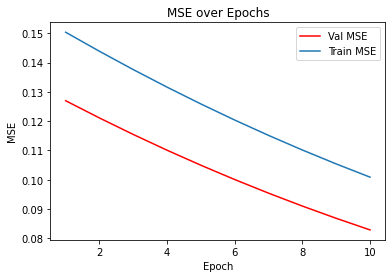

In [24]:
import matplotlib.pyplot as plt
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = list(range(1, len(val_loss) + 1))
    plt.plot(x, val_loss, color = 'red', label = 'Val MSE')
    plt.plot(x, train_loss, label = 'Train MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE over Epochs')
    plt.legend()
    
plot_loss(history)  

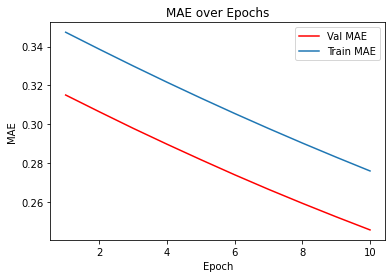

In [25]:
#your plot codes goes here
def plot_mae(history):
    train_loss = history.history['mae']
    test_loss = history.history['val_mae']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val MAE')
    plt.plot(x, train_loss, label='Train MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE over Epochs')
    plt.legend()
    
plot_mae(history)

### 2.5.2 Explore the performance with different activation function and loss function

In [26]:
# your code goes here
# Create a sequential model
network = models.Sequential()

# Try changing to different type of activation function to see the differences
network.add(layers.Dense(3, activation='relu', input_shape=(x_col_count,)))
network.add(layers.Dense(2, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

# Observe the use loss function in the codes below
network.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

history2 = network.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.2)

test_loss, test_mae = network.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test mae: {:.4f}'.format(test_mae))

Epoch 1/10
1/1 [==============================] - 0s 411ms/step - loss: 0.0825 - mae: 0.2642 - val_loss: 0.0796 - val_mae: 0.2622
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0819 - mae: 0.2628 - val_loss: 0.0788 - val_mae: 0.2604
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - loss: 0.0811 - mae: 0.2612 - val_loss: 0.0781 - val_mae: 0.2586
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0804 - mae: 0.2596 - val_loss: 0.0773 - val_mae: 0.2568
Epoch 5/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0796 - mae: 0.2579 - val_loss: 0.0765 - val_mae: 0.2549
Epoch 6/10
1/1 [==============================] - 0s 27ms/step - loss: 0.0789 - mae: 0.2562 - val_loss: 0.0757 - val_mae: 0.2530
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0780 - mae: 0.2544 - val_loss: 0.0749 - val_mae: 0.2511
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0772 - mae: 0.2525 - va

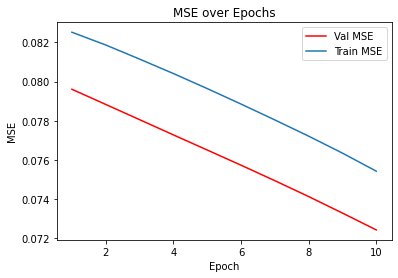

In [27]:
plot_loss(history2)

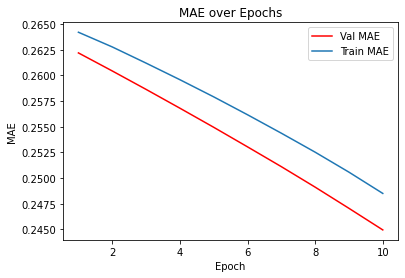

In [28]:
plot_mae(history2)

### 2.5.3 Conclude your tuned activation and loss function used